In [16]:
#default_exp simulate_data

In [17]:
#export
import numpy as np
import pandas as pd

# Simulated Time Series

> Generate a Simulated Time Series with Seasonality, Trend, Level and Noise

In [18]:
#export
def __numpy_time_series(
    num_points=30,
    level=3,
    trend_amplitude=1 / 3,
    sinus_amplitude=1,
    noise_amplitude=2 / 1,
    start=0,
    finish=4 * np.pi,
):

    interval = np.linspace(
        start,
        finish,
        num=num_points + 1,
    )

    season = np.sin(interval[:-1])
    trend = np.vectorize(lambda x: trend_amplitude * x)(interval[:-1])
    noise = noise_amplitude * np.random.random((num_points,))
    signal = level + season + trend + noise
    return interval, signal

In [19]:
#export
def pandas_time_series(ts_col='time_series', **kwargs):
    """
    Generates a Dataframe with simulated data 
    
    -----
    Parameters
    -----
    ts_column : str. Default 'time_series'. Name of time series column
    **kwargs : Argumetns of the __numpy_time-series 
    
    -------
    Returns
    -------
    
    Dataframe : 
    
    """

    interval, d = __numpy_time_series(**kwargs)

    df = pd.DataFrame(
        {ts_col: np.append(d, np.nan)},
        index=interval,
    )
    df.index = interval
    df.index.name = 'Time Series Units'

    return df

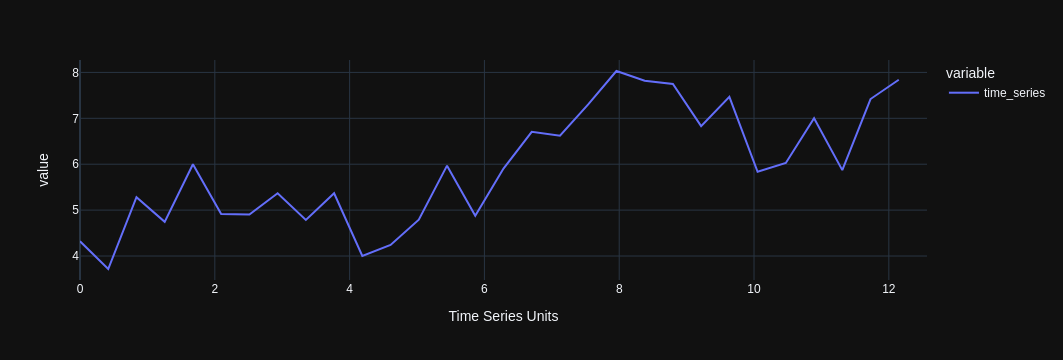

In [20]:
df = pandas_time_series()
fig = df.plot(backend='plotly')
fig.update_layout(template="plotly_dark",)